In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
police_killings = pd.read_csv('police_killings.csv', encoding='ISO-8859-1')
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [5]:
police_killings.shape

(467, 34)

In [6]:
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [7]:
police_killings.dtypes

name                     object
age                      object
gender                   object
raceethnicity            object
month                    object
day                       int64
year                      int64
streetaddress            object
city                     object
state                    object
latitude                float64
longitude               float64
state_fp                  int64
county_fp                 int64
tract_ce                  int64
geo_id                    int64
county_id                 int64
namelsad                 object
lawenforcementagency     object
cause                    object
armed                    object
pop                       int64
share_white              object
share_black              object
share_hispanic           object
p_income                 object
h_income                float64
county_income             int64
comp_income             float64
county_bucket           float64
nat_bucket              float64
pov     

In [8]:
police_killings['raceethnicity'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

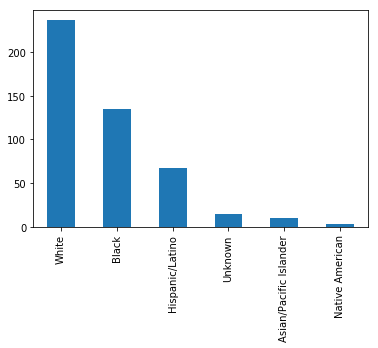

In [9]:
race_killings = police_killings['raceethnicity'].value_counts()
race_killings.plot(kind='bar')
plt.show()

In [10]:
race_percentage = pd.Series({'White': 63.7, 'Black': 12.2, 'Hispanic/Latino': 16.3, 'Asian/Pacific Islander': 4.9, 'Native American': 0.7, 'Unknown': 2.1})
race_percentage

White                     63.7
Black                     12.2
Hispanic/Latino           16.3
Asian/Pacific Islander     4.9
Native American            0.7
Unknown                    2.1
dtype: float64

In [11]:
race_combined = pd.DataFrame({'race_killings': race_killings, 'race_percentage': race_percentage})
race_combined

,race_killings,race_percentage
Asian/Pacific Islander,10,4.9
Black,135,12.2
Hispanic/Latino,67,16.3
Native American,4,0.7
Unknown,15,2.1
White,236,63.7


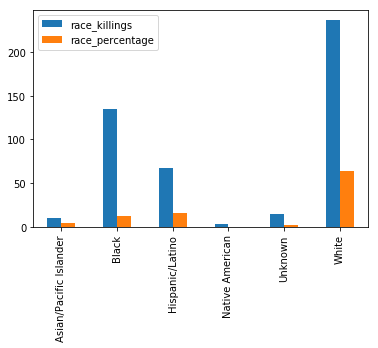

In [13]:
race_combined.plot(kind='bar')
plt.show()

In [14]:
race_killed_ratio = race_killings / race_percentage
race_killed_ratio

Asian/Pacific Islander     2.040816
Black                     11.065574
Hispanic/Latino            4.110429
Native American            5.714286
Unknown                    7.142857
White                      3.704867
dtype: float64

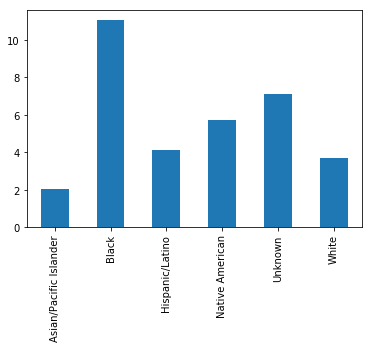

In [15]:
race_killed_ratio.plot(kind='bar')
plt.show()

In [16]:
p_income = police_killings[police_killings['p_income'] != '-']['p_income'].astype(int)
p_income.head()

0    28375
1    14678
2    25286
3    17194
4    33954
Name: p_income, dtype: int64

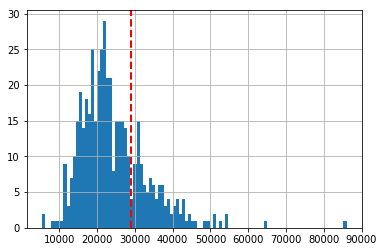

In [17]:
p_income.hist(bins=100)
plt.axvline(28851, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [18]:
h_income = police_killings['h_income']
h_income.head()

0    51367.0
1    27972.0
2    45365.0
3    48295.0
4    68785.0
Name: h_income, dtype: float64

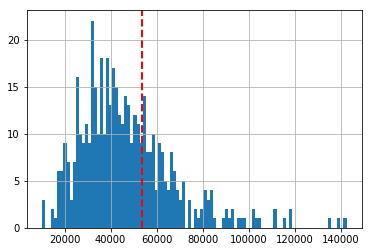

In [19]:
h_income.hist(bins=100)
plt.axvline(53657, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [20]:
state_pop = pd.read_csv('state_population.csv')
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [21]:
counts = police_killings['state_fp'].value_counts()
counts.head()

6     74
48    47
12    29
4     25
40    22
Name: state_fp, dtype: int64

In [22]:
states = pd.DataFrame({'STATE': counts.index, 'shootings': counts})
states.head()

,STATE,shootings
6,6,74
48,48,47
12,12,29
4,4,25
40,40,22


In [23]:
states = states.merge(state_pop, on='STATE')
states.head()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,6,74,40,4,9,California,39144818,30023902,76.7
1,48,47,40,3,7,Texas,27469114,20257343,73.7
2,12,29,40,3,5,Florida,20271272,16166143,79.7
3,4,25,40,4,8,Arizona,6828065,5205215,76.2
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4


In [24]:
states['pop_millions'] = states['POPESTIMATE2015'] / 1000000
states['pop_millions'].head()

0    39.144818
1    27.469114
2    20.271272
3     6.828065
4     3.911338
Name: pop_millions, dtype: float64

In [22]:
states['rate'] = states['shootings'] / states['pop_millions']
states['rate'].head()

0    1.890416
1    1.711013
2    1.430596
3    3.661359
4    5.624674
Name: rate, dtype: float64

In [23]:
sorted_rate = states.sort_values(by=['rate'], ascending=False)
sorted_rate[['STATE', 'shootings', 'NAME', 'pop_millions', 'rate']]

,STATE,shootings,NAME,pop_millions,rate
4,40,22,Oklahoma,3.911338,5.624674
3,4,25,Arizona,6.828065,3.661359
27,31,6,Nebraska,1.896190,3.164240
34,15,4,Hawaii,1.431603,2.794071
39,2,2,Alaska,0.738432,2.708442
33,16,4,Idaho,1.654930,2.417021
32,35,5,New Mexico,2.085109,2.397956
10,22,11,Louisiana,4.670724,2.355095
7,8,12,Colorado,5.456574,2.199182
41,10,2,Delaware,0.945934,2.114312


In [24]:
most_ten = sorted_rate[:10]['STATE']
most_ten

4     40
3      4
27    31
34    15
39     2
33    16
32    35
10    22
7      8
41    10
Name: STATE, dtype: int64

In [25]:
least_ten = sorted_rate[-10:]['STATE']
least_ten

31    55
12    39
11    17
45    23
42    33
29    25
6     36
38    19
22    42
43     9
Name: STATE, dtype: int64

In [26]:
pk = police_killings[(police_killings['share_white'] != '-') & (police_killings['share_black'] != '-') & (police_killings['share_hispanic'] != '-')]
pk.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [27]:
pk[['share_white', 'share_black', 'share_hispanic']].dtypes

share_white       object
share_black       object
share_hispanic    object
dtype: object

In [28]:
pk[['share_white', 'share_black', 'share_hispanic']] = pk[['share_white', 'share_black', 'share_hispanic']].astype(float)
pk[['share_white', 'share_black', 'share_hispanic']].dtypes

/Users/shian48263/.anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


share_white       float64
share_black       float64
share_hispanic    float64
dtype: object

In [29]:
top_ten = pk[pk['state_fp'].isin(most_ten)]
top_ten.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,...,79.0,15523,20833.0,53596,0.388704,1.0,1.0,58,0.073651,0.102955
21,Andre Murphy Sr,42,Male,Black,January,7,2015,1223 Omaha Ave,Norfolk,NE,...,2.9,23342,54809.0,46566,1.177018,4.0,3.0,10.3,0.035221,0.258886
24,Andrew Jackson,26,Male,White,April,29,2015,1200 W Florida Ave,Chickasha,OK,...,9.7,17695,32034.0,49637,0.645365,1.0,1.0,20.3,0.011335,0.169402
42,Aurelio Duarte,40,Male,Hispanic/Latino,March,8,2015,3632 SW 38th St,Oklahoma City,OK,...,56.6,17225,32860.0,45215,0.726750,2.0,1.0,25.1,0.142747,0.035339


In [30]:
low_ten = pk[pk['state_fp'].isin(least_ten)]
low_ten.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
26,Andrew Toto,54,Male,White,January,21,2015,Scobie Pond Rd and Julian Rd,Derry,NH,...,1.9,32921,61167.0,77348,0.790803,1.0,4.0,5.4,0.087385,0.284854
31,Angelo West,41,Male,Black,March,27,2015,Humboldt Ave and Ruthven St,Roxbury,MA,...,35.2,14995,20388.0,53540,0.380799,1.0,1.0,41.3,0.220398,0.182336
35,Anthony Gomez Jr,29,Male,Black,May,19,2015,305 E Walnut St,Lancaster,PA,...,37.1,21868,42027.0,56483,0.744065,1.0,2.0,9.3,0.206855,0.172319


In [31]:
top_ten[['pop', 'county_income', 'share_white', 'share_black', 'share_hispanic']].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

In [32]:
low_ten[['pop', 'county_income', 'share_white', 'share_black', 'share_hispanic']].mean()

pop                4153.472727
county_income     55037.963636
share_white          60.132727
share_black          21.610909
share_hispanic       12.994545
dtype: float64